In [1]:
#Major dataset
import pandas as pd
import numpy as np
data= pd.read_csv("movies_metadata.csv",low_memory=False)


In [2]:
##Data Preprocessing
#Remove all the null values 
data['revenue']= data['revenue'].replace(0,np.nan)
data['budget']=data['budget'].replace(0,np.nan)
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
#data.head()
data['Release year']=pd.to_datetime(data['release_date'],errors='coerce').dt.year
data['Release month']=pd.to_datetime(data['release_date'],errors='coerce').dt.month
data['Release day']=pd.to_datetime(data['release_date'],errors='coerce').dt.day
from ast import literal_eval
def  get_value(x):
    l = []
    if isinstance(x,list):
        for i in x:
               l.append(i['name'])
        return l
    return []

data['genres'] = data['genres'].apply(literal_eval)
data['genres'] = data['genres'].apply(get_value)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py


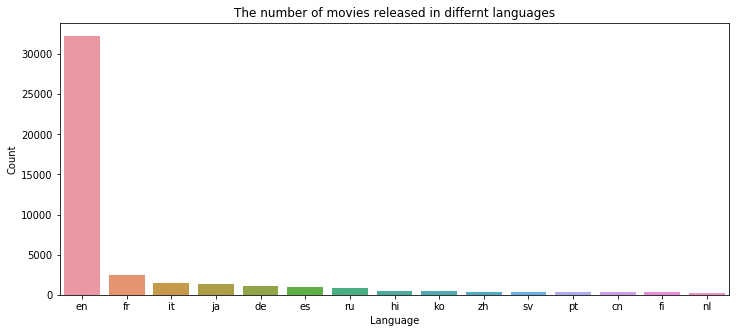

In [4]:
#Finding out number of movies releazed in different langauages
languages=pd.DataFrame(data.groupby('original_language').size())
languages.columns=['Number']
languages=languages.sort_values(by=['Number'],ascending=False)
languages=languages[0:15]
plt.figure(figsize=(12,5))
sns.barplot(x= languages.index , y='Number', data=languages)
plt.title("The number of movies released in differnt languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

#As we see there are many english movies released 

Text(0, 0.5, 'Number')

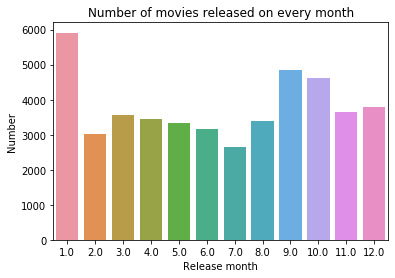

In [5]:
sns.countplot(x='Release month', data=data)
plt.title('Number of movies released on every month')
plt.ylabel('Number')

#As we see there are many movies released in the month of january

Text(0, 0.5, 'Number')

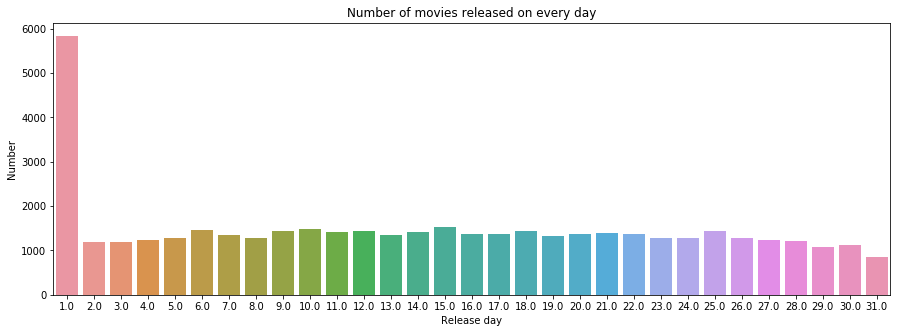

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='Release day', data=data)
plt.title('Number of movies released on every day')
plt.ylabel('Number')

#There are many movies released on 1st of every month

In [7]:
generes = pd.DataFrame(data['genres'].value_counts()).reset_index()
generes.columns = ['genres', 'movies']
generes.head()

#we have 5000 movies of only drama genere in our dataset which is the highest

,genres,movies
0,[Drama],5000
1,[Comedy],3621
2,[Documentary],2723
3,[],2442
4,"[Drama, Romance]",1301


Text(0, 0.5, 'Revenue')

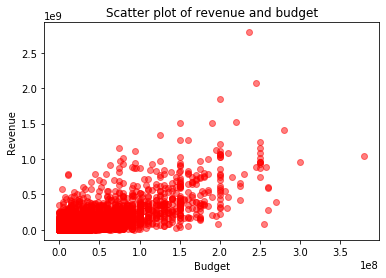

In [8]:
x=data['budget']
y=data['revenue']
plt.scatter(x,y,alpha=0.5,color='red')
plt.title("Scatter plot of revenue and budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")

#As we see most of the time as the budget increases the revenue increases

Text(0.5, 1.0, 'Scatter plot of movie release year and revenue ')

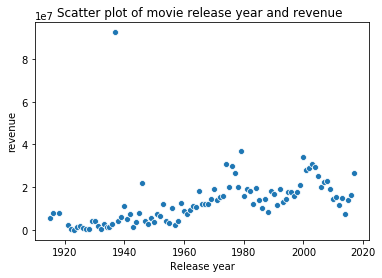

In [24]:
year_rev=pd.DataFrame(data.groupby('Release year')['revenue'].median())
year_rev=year_rev.dropna()
#year_rev['Release year'] = year_rev['Release year'].astype(str)
#sns.countplot(x=year_rev.index,data=year_rev)
sns.scatterplot(x=year_rev.index, y="revenue", data=year_rev)
plt.title("Scatter plot of movie release year and revenue ")


#From 1960 and soo on the revenue of the movie released was increasing but from 2000s the revenue was decreasing which i
#is very surprising

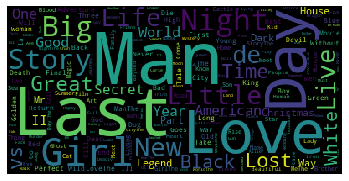

In [10]:
data['title'] = data['title'].astype('str')
title = WordCloud(stopwords=STOPWORDS).generate(''.join(data['title']))
plt.imshow(title)
plt.axis('off')
plt.show()

#The Words Last,Day,Girl,Love and man are the most commenly used words in the movie titles

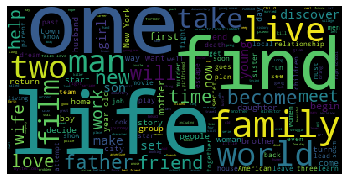

In [11]:
data['overview'] = data['overview'].astype('str')
overview = WordCloud(stopwords=STOPWORDS).generate(''.join(data['overview']))
plt.imshow(overview)
plt.axis('off')
plt.show()


#The Words one,find,life are the most frequent words used in overview 

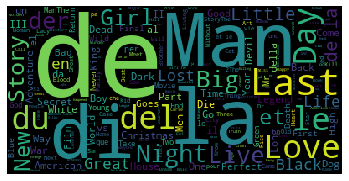

In [12]:
data['original_title'] = data['original_title'].astype('str')
original_title = WordCloud(stopwords=STOPWORDS).generate(''.join(data['original_title']))
plt.imshow(original_title)
plt.axis('off')
plt.show()

#De, La,Man are the most frequent words used in original titiles

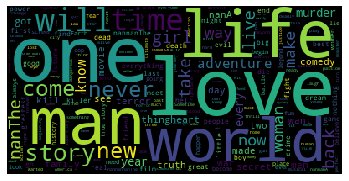

In [13]:
data['tagline'] = data['tagline'].astype('str')
tagline = WordCloud(stopwords=STOPWORDS).generate(''.join(data['tagline']))
plt.imshow(tagline)
plt.axis('off')
plt.show()


#Love, man, life,one are the most used words in tagline

In [20]:
##Ratings data set 

In [21]:
ratings_small=pd.read_csv('ratings_small.csv')
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Text(0, 0.5, 'Number of movies')

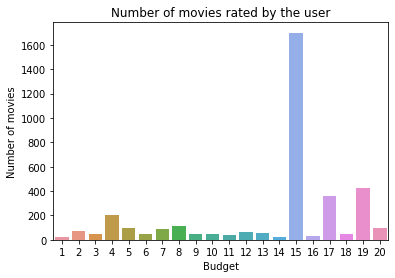

In [25]:
ratings_per_person=pd.DataFrame(ratings_small.groupby('userId')['movieId'].count())
#plt.figure(figsize=(10,12))
ratings_per_person=ratings_per_person[0:20]
#sns.barplot(x=ratings_small.index,y='movieId',data=ratings_per_person)
#sns.scatterplot(x=ratings_small.index, y='movieId', data=ratings_small)
sns.barplot(x=ratings_per_person.index,y='movieId',data=ratings_per_person)
plt.title("Number of movies rated by the user")
plt.xlabel("Budget")
plt.ylabel("Number of movies")

#The graph shows the number of movies rated by each user. since we have many users i took only 15 

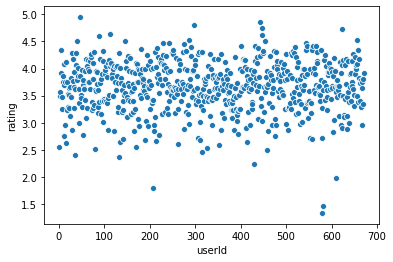

In [23]:
mean_ratings_per_person=pd.DataFrame(ratings_small.groupby('userId')['rating'].mean())
sns.scatterplot(x=mean_ratings_per_person.index,y='rating',data=mean_ratings_per_person)
plt.title("Average ratings given by the user")

plt.ylabel("Average Rating")

#The below plot gives us the average rating given by each and every user